In [ ]:


import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/tumor-images-csv/MRI images.csv
/kaggle/input/tumor-images/DL Project MRI/Te-noTr_0002.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-glTr_0001.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-piTr_0000.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-meTr_0004.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-piTr_0002.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-glTr_0003.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-noTr_0001.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-noTr_0000.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-meTr_0003.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-piTr_0004.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-glTr_0000.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-meTr_0002.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-piTr_0003.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-noTr_0003.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-glTr_0002.jpg
/kaggle/input/tumor-images/DL Project MRI/Te-meTr_0001.jpg
/kaggle/in

In [ ]:
import numpy as np
import pandas as pd
import os
import re
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 16

In [ ]:
img_path = '/kaggle/input/tumor-images/DL Project MRI'
img_df = pd.read_csv('/kaggle/input/tumor-images-csv/MRI images.csv')


In [ ]:
img_df.head()

,id,filename,type,link
0,Te-glTr_0000,Te-glTr_0000.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...
1,Te-glTr_0001,Te-glTr_0001.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...
2,Te-glTr_0002,Te-glTr_0002.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...
3,Te-glTr_0003,Te-glTr_0003.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...
4,Te-glTr_0004,Te-glTr_0004.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...


In [ ]:
img_df['filename'] = img_df['id'].astype(str) + '.jpg'

In [ ]:
img_df

,id,filename,type,link
0,Te-glTr_0000,Te-glTr_0000.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...
1,Te-glTr_0001,Te-glTr_0001.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...
2,Te-glTr_0002,Te-glTr_0002.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...
3,Te-glTr_0003,Te-glTr_0003.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...
4,Te-glTr_0004,Te-glTr_0004.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...
5,Te-meTr_0000,Te-meTr_0000.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...
6,Te-meTr_0001,Te-meTr_0001.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...
7,Te-meTr_0002,Te-meTr_0002.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...
8,Te-meTr_0003,Te-meTr_0003.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...
9,Te-meTr_0004,Te-meTr_0004.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...


In [ ]:
img_df.size

80

In [ ]:
img_df.shape

(20, 4)

In [ ]:
img_files = os.listdir(img_path)
img_files

['Te-noTr_0002.jpg',
 'Te-glTr_0001.jpg',
 'Te-piTr_0000.jpg',
 'Te-meTr_0004.jpg',
 'Te-piTr_0002.jpg',
 'Te-glTr_0003.jpg',
 'Te-noTr_0001.jpg',
 'Te-noTr_0000.jpg',
 'Te-meTr_0003.jpg',
 'Te-piTr_0004.jpg',
 'Te-glTr_0000.jpg',
 'Te-meTr_0002.jpg',
 'Te-piTr_0003.jpg',
 'Te-noTr_0003.jpg',
 'Te-glTr_0002.jpg',
 'Te-meTr_0001.jpg',
 'Te-meTr_0000.jpg',
 'Te-piTr_0001.jpg',
 'Te-noTr_0004.jpg',
 'Te-glTr_0004.jpg']

In [ ]:
img_df['present'] = img_df['filename'].apply(lambda x:x in img_files)
img_df

,id,filename,type,link,present
0,Te-glTr_0000,Te-glTr_0000.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
1,Te-glTr_0001,Te-glTr_0001.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
2,Te-glTr_0002,Te-glTr_0002.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
3,Te-glTr_0003,Te-glTr_0003.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
4,Te-glTr_0004,Te-glTr_0004.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
5,Te-meTr_0000,Te-meTr_0000.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True
6,Te-meTr_0001,Te-meTr_0001.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True
7,Te-meTr_0002,Te-meTr_0002.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True
8,Te-meTr_0003,Te-meTr_0003.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True
9,Te-meTr_0004,Te-meTr_0004.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True


In [ ]:
img_df = img_df[img_df['present']].reset_index(drop=True)

In [ ]:
img_df


,id,filename,type,link,present
0,Te-glTr_0000,Te-glTr_0000.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
1,Te-glTr_0001,Te-glTr_0001.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
2,Te-glTr_0002,Te-glTr_0002.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
3,Te-glTr_0003,Te-glTr_0003.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
4,Te-glTr_0004,Te-glTr_0004.jpg,glioma,https://storage.googleapis.com/kagglesdsdata/d...,True
5,Te-meTr_0000,Te-meTr_0000.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True
6,Te-meTr_0001,Te-meTr_0001.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True
7,Te-meTr_0002,Te-meTr_0002.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True
8,Te-meTr_0003,Te-meTr_0003.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True
9,Te-meTr_0004,Te-meTr_0004.jpg,meningioma,https://storage.googleapis.com/kagglesdsdata/d...,True


In [ ]:
#img_df = img_df.sample

In [ ]:


img_size = 60

datagen = ImageDataGenerator(rescale=1/255.)

generator = datagen.flow_from_dataframe(dataframe = img_df,
                                       directory = img_path,
                                       target_size = (img_size,img_size),
                                       x_col = 'filename',
                                       class_mode = None,
                                       batch_size = 32,
                                       shuffle = False,
                                       classes= None)

Found 20 validated image filenames.


In [ ]:
base_model = VGG16(include_top=False, input_shape= (img_size,img_size,3))

for layer in base_model.layers:
    layer.trainable = False


input_layer = Input(shape=(img_size,img_size,3))
x= base_model(input_layer)
output= GlobalAveragePooling2D()(x)

embeddings = Model(inputs = input_layer, outputs= output)
embeddings.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
X = embeddings.predict(generator, verbose=1)

1/1 [==============================] - 1s 817ms/step


In [ ]:
def read_img(image_path):
    image = load_img(os.path.join(img_path,image_path),target_size=(img_size,img_size,3))
    image = img_to_array(image)
    image = image/255.
    return image

In [ ]:
import random
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y = img_df['id']

In [ ]:
nearest_neighbors = KNeighborsClassifier(n_neighbors = 7)
nearest_neighbors.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
img_df = img_df.reset_index(drop=True)

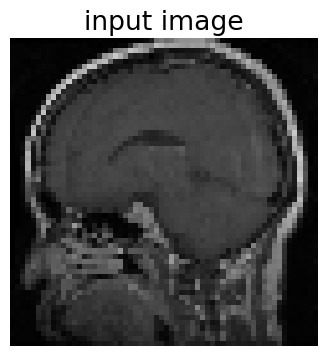

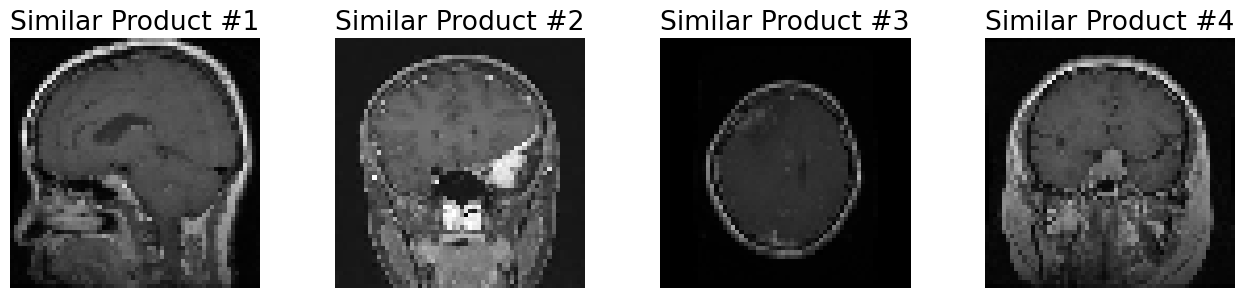

In [ ]:
for _ in range(1):
    i = random.randint(0,len(img_df))
    img1 = read_img(img_df.loc[i,'filename'])
    dist, index = nearest_neighbors.kneighbors(X=X[i,:].reshape(1,-1))
    plt.figure(figsize = (4 , 4))
    plt.imshow(img1)
    plt.title("input image")
    plt.axis('off')

    plt.figure(figsize = (20 , 20))
    for i in range(1,5):
        plt.subplot(1 , 5, i)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = read_img(img_df.loc[index[0][i],'filename'])
        plt.imshow(image)
        plt.title(f'Similar Product #{i}')
        plt.axis('off')